<a href="https://colab.research.google.com/github/ashutosh-619/Working-On-Common-Datasets/blob/main/Red_Wine_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np                          #for basic data preprocessing and linear algebra functions
import pandas as pd                         #to deal with dataframes
import matplotlib.pyplot as plt             #for data visualization and exploraory data analysis
import seaborn as sns

In [2]:
df = pd.read_csv('winequality-red.csv')
df.head()                                   #prints the first 5 rows of the dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.shape                                   #print the shape of the dataset

(1599, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
#Let's see the statistical properties of our dataset.
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
#It can be observed that the density column doesn't vary much in the dataset and thus, it won't help our model while predicting.
#So we'll drop it.
df = df.drop(labels='density', axis=1)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,5


In [7]:
#Let us check if there are any missing values
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
#As it can be seen, there are no missing values in our dataset, which is a good thing.

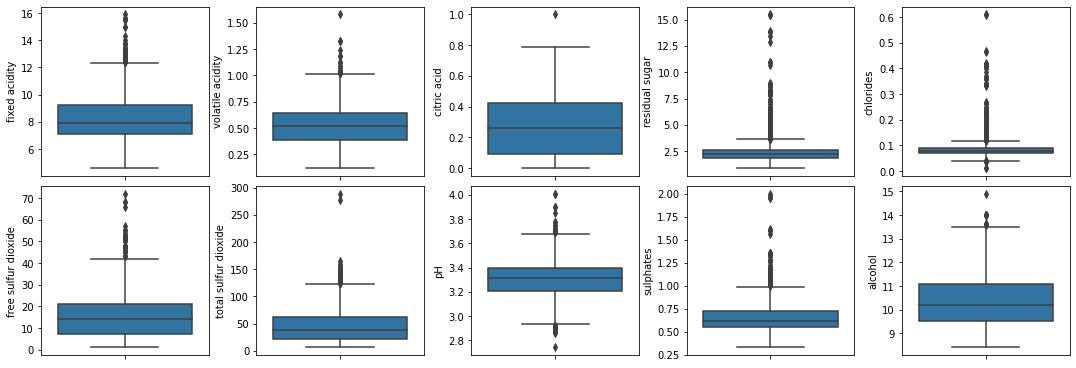

In [9]:
#Now we'll check for outliers.
fig, ax = plt.subplots(ncols=5, nrows=2, figsize=(15, 5))       #setting up the area
ax = ax.flatten()
index = 0
for i in df.columns:
  if i != 'quality':                                            #we won't look for outliers in the target variable
    sns.boxplot(y=i, data=df, ax=ax[index])                #boxplots are used to detect outliers
    index +=1
plt.tight_layout(pad=0.4)
plt.show()

In [10]:
#It can be observed that there are indeed a fair number of outliers.
#We chose not to drop them, as they can provide some significant amount of information to our model later on.

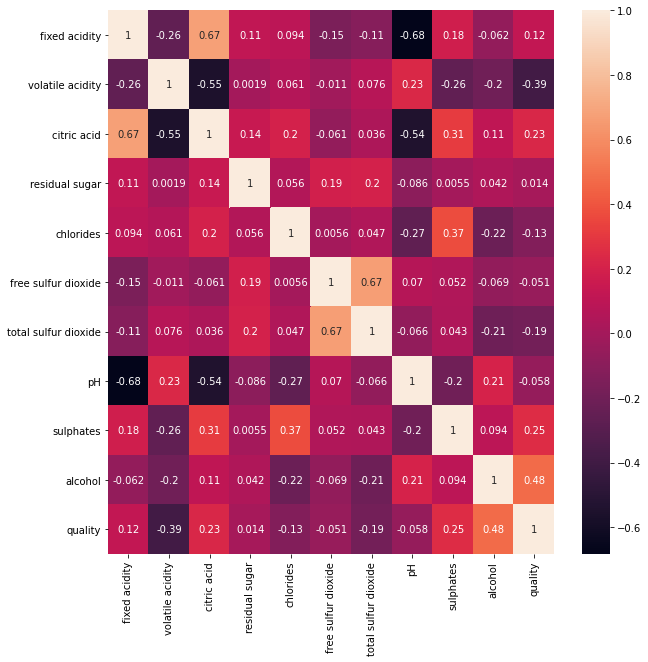

In [11]:
#We can also create a heatmap to see the correlation among the features and the target variable of our dataset.
plt.figure(figsize=(10,10))
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [12]:
#The last row of the heatmap above tells us the correlation of the features with 'quality'.
#Features with correlation approxiamately 0 indicates they are uncorrelated and thus, can be dropped.
#But for now, we choose to keep them.

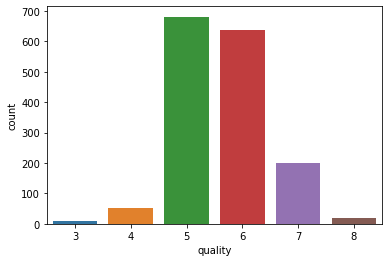

In [13]:
#Let us plot the final column (our target variable) to see the values and their counts.
sns.countplot(x='quality', data=df)

In [14]:
#As we can see, there is severe data imbalance present in the dataset.
#We will be converting the problem into a binary classification problem.
#To do so, we'll be modifying the final column of the dataset.
#Values greater than or equal to 7 will be set to label 1 i.e. good quality and values lesser than 6 will be set to 0 i.e. bad quality.

df['good_quality'] = [1 if val >= 7 else 0 for val in df['quality']]
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality,good_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,5,0


In [15]:
#To check the exact values of the good and bad quality wines, we use the value_counts method.
df['good_quality'].value_counts()

0    1382
1     217
Name: good_quality, dtype: int64

In [16]:
#Looks like the dataset is pretty balanced now. So we can move ahead.
#We'll now split the dataset into independent and dependent features.

X = df.drop(['quality', 'good_quality'], axis=1)
y = df['good_quality']

In [17]:
#Next, we perform the train test split.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=221)

In [18]:
#We'll now standardize the dataset to bring all the values on a similar scale.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
#Let us try fitting a logistic regression model now.
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred1 = log_reg.predict(X_test)

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred1))
print("\n Accuracy Score: ", accuracy_score(y_test, y_pred1))
print(" F1 Score: ", f1_score(y_test, y_pred1))

Confusion Matrix: 
 [[260  15]
 [ 31  14]]

 Accuracy Score:  0.85625
 F1 Score:  0.37837837837837834


In [21]:
from sklearn.tree import DecisionTreeClassifier

dct = DecisionTreeClassifier()
dct.fit(X_train, y_train)

y_pred2 = dct.predict(X_test)

In [22]:
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred2))
print("\n Accuracy Score: ", accuracy_score(y_test, y_pred2))
print(" F1 Score: ", f1_score(y_test, y_pred2))

Confusion Matrix: 
 [[255  20]
 [ 15  30]]

 Accuracy Score:  0.890625
 F1 Score:  0.631578947368421


In [23]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred3 = rfc.predict(X_test)

In [24]:
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred3))
print("\n Accuracy Score: ", accuracy_score(y_test, y_pred3))
print(" F1 Score: ", f1_score(y_test, y_pred3))

Confusion Matrix: 
 [[269   6]
 [ 20  25]]

 Accuracy Score:  0.91875
 F1 Score:  0.6578947368421053
